# Churn Prediction


Churn prediction is common use case in machine learning domain. 'Churn' simply means "leaving the company". It is very critical for business to have an idea about why and when customers are likely to churn. Having a robust and accurate churn prediction model helps businesses to take actions to prevent customers from leaving the company.

In this project, I will use "Telco Customer Churn" data set which is available on Kaggle.

There are 20 featuures (independent variables) and 1 target (dependent) variable for 7043 customers. Target variable indicates if a customer has has left the company (i.e. churn=yes) within the last month. Since the target variable has two states (yes/no or 1/0), this is a binary classification problem

In [265]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [266]:
# Importing the dataset that we'll be working with
df = pd.read_csv("telco_churn_pred.csv")

In [267]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [268]:
df.shape


(7043, 21)

Courtesy to Kaggle, the dataset that is used here is pre-cleaned, i.e. no null values or missing values are present in the dataset. But, it's always good to verify

In [269]:
df.isna().sum().sum()  #determines the null values(if any) in each single row and column

0

In [270]:
df.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [271]:
df['customerID'].head()

0    7590-VHVEG
1    5575-GNVDE
2    3668-QPYBK
3    7795-CFOCW
4    9237-HQITU
Name: customerID, dtype: object

In [272]:
df.dtypes

customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

Our target variable is 'Churn' which is an object-type variable. Let us see how it shows up in the data

In [273]:
df['Churn'].value_counts()

No     5174
Yes    1869
Name: Churn, dtype: int64

**Note that our target variable is highly imbalanced here.Positive class(indicating churn=true) is much less than negative class(indicating churn=false)**

What we can do is at best, try to vary the sample size to overcome the negative impact of this impbalanced distribution.



So we know something about the 'Churn' variable. Let us try to know more about other features of dataset as well. Let's start with features having two values (Binary features) since I can see a majority having a single logical value (Yes/No)

In [274]:
columns = df.columns
binary_cols = []

for col in columns:
    if df[col].value_counts().shape[0] == 2:
        binary_cols.append(col)

In [275]:
binary_cols

['gender',
 'SeniorCitizen',
 'Partner',
 'Dependents',
 'PhoneService',
 'PaperlessBilling',
 'Churn']

The remaining categorical values have more than 2 values

In [276]:
# Categorical features with multiple classes
multiple_cols_cat = ['MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup',
 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract','PaymentMethod']

Data seems more comprehensive when we bring it in perspective with images and figure illustrations. So let us visualize some charts and try to grasp more knowledge. We will start with the binary features

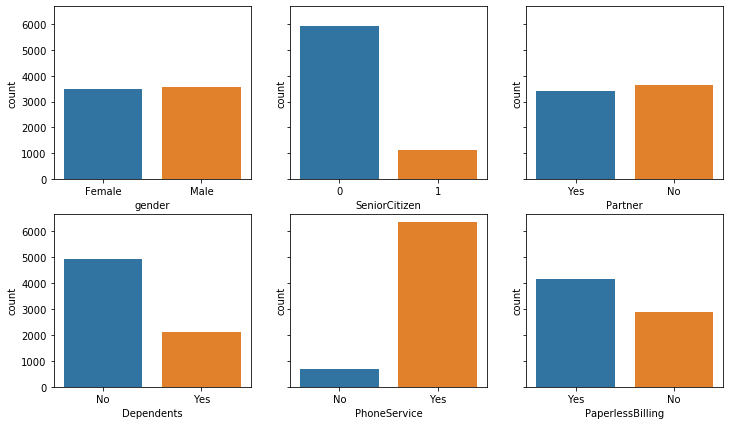

In [277]:
fig, axes = plt.subplots(2, 3, figsize=(12, 7), sharey=True)

sns.countplot("gender", data=df, ax=axes[0,0])

sns.countplot("Dependents", data=df, ax=axes[1,0])
sns.countplot("SeniorCitizen", data=df, ax=axes[0,1])
sns.countplot("Partner", data=df, ax=axes[0,2])

sns.countplot("PhoneService", data=df, ax=axes[1,1])
sns.countplot("PaperlessBilling", data=df, ax=axes[1,2])

I want to draw your focus on the middle column

**There is a high imbalance in SeniorCitizen and PhoneService variables. We can safely interpret that most of the customers are not senior and additionally, most customers have a phone service**

It is better to check how the target variable 'Churn' changes according to the binary features. To be able to make calculations, we need to change the values of target variable. So I choose to represent "Yes" with a 1 and "No" with a 0.

In [278]:
churn_num = {'Yes':1, 'No':0}
df.Churn.replace(churn_num, inplace=True)

Let's see if churn rate is different for males and females

In [279]:
df[['gender','Churn']].groupby(['gender']).mean()

,Churn
gender,
Female,0.269209
Male,0.261603


Gender variation does not bring in much power to our prediction model, as we see (The average churn rate is approximately the same for males and females).

Henceforth, I will avoid 'Gender' variable for our prediction model.

Let's check for redundancy for other variables too 

In [280]:
df[['SeniorCitizen','Churn']].groupby(['SeniorCitizen']).mean()

,Churn
SeniorCitizen,
0,0.236062
1,0.416813


In [281]:
df[['Partner','Churn']].groupby(['Partner']).mean()

,Churn
Partner,
No,0.329580
Yes,0.196649


In [282]:
df[['PaperlessBilling','Churn']].groupby(['PaperlessBilling']).mean()

,Churn
PaperlessBilling,
No,0.163301
Yes,0.335651


In [283]:
df[['PhoneService','Churn']].groupby(['PhoneService']).mean()

,Churn
PhoneService,
No,0.249267
Yes,0.267096


In [284]:
df[['Dependents','Churn']].groupby(['Dependents']).mean()

,Churn
Dependents,
No,0.312791
Yes,0.154502


We see that the other binary features have an effect on the target variable.

In [285]:
s1 = df.corr()

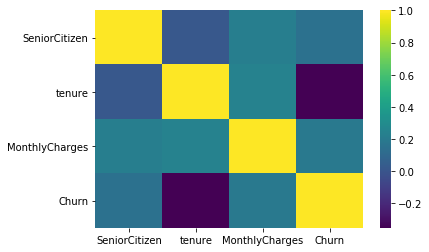

In [286]:
sns.heatmap(data = s1, cmap = 'viridis')

# Other Categorical Features

It is time to explore other categorical features. After this module, I will attempt the remaining continuous features- such as tenure,monthly charges and total charges.

There are 6 variables that come with internet service which are 'StreamingTV', 'StreamingMovies', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection' and 'TechSupport'. There variables come into play if customer has internet service.

**Internet Service**

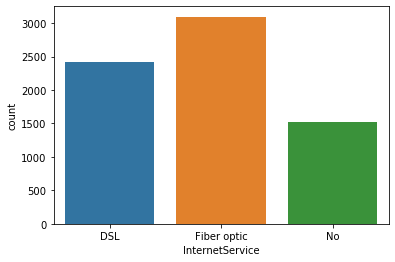

In [287]:
sns.countplot("InternetService", data=df)

In [288]:
df[['InternetService','Churn']].groupby('InternetService').mean()

,Churn
InternetService,
DSL,0.189591
Fiber optic,0.418928
No,0.074050


**Highlight: We can sense that active Internet service has got to do something with Churn rate. Customers with fiber optic internet service are much likely to churn than other customers although there is not a big difference in the number of customers with DSL and fiber optic**

Let’s also check the monthly charges.

In [289]:
df[['InternetService','MonthlyCharges']].groupby('InternetService').mean()

,MonthlyCharges
InternetService,
DSL,58.102169
Fiber optic,91.500129
No,21.079194



Fiber optic service is much more expensive than DSL which may be one of the reasons why customers churn.

Let's check the distributions of internet-related service variables.

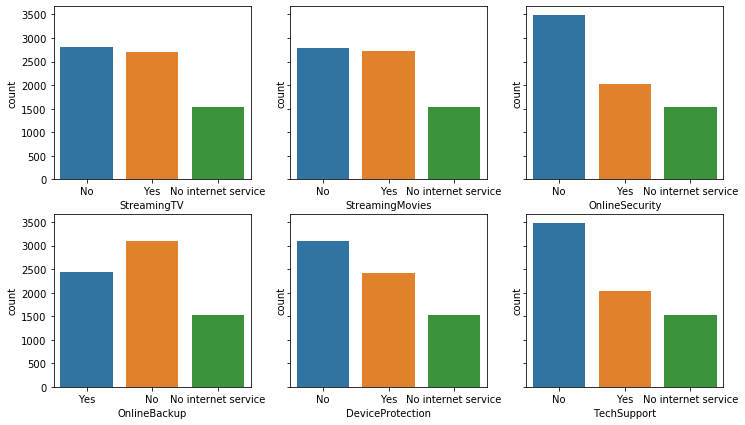

In [290]:
fig, axes = plt.subplots(2, 3, figsize=(12, 7), sharey=True)

sns.countplot("StreamingTV", data=df, ax=axes[0,0])
sns.countplot("StreamingMovies", data=df, ax=axes[0,1])
sns.countplot("OnlineSecurity", data=df, ax=axes[0,2])
sns.countplot("OnlineBackup", data=df, ax=axes[1,0])
sns.countplot("DeviceProtection", data=df, ax=axes[1,1])
sns.countplot("TechSupport", data=df, ax=axes[1,2])

Let's get a quantitative measure of churn rates for different internet realted services. Starting with "people's choice" - Movie Streaming :)

In [291]:
df[['StreamingMovies','Churn']].groupby('StreamingMovies').mean()

,Churn
StreamingMovies,
No,0.336804
No internet service,0.074050
Yes,0.299414


In [292]:
df[['StreamingTV','Churn']].groupby('StreamingTV').mean()

,Churn
StreamingTV,
No,0.335231
No internet service,0.074050
Yes,0.300702


In [293]:
df[['OnlineSecurity','Churn']].groupby('OnlineSecurity').mean()

,Churn
OnlineSecurity,
No,0.417667
No internet service,0.074050
Yes,0.146112


In [294]:
df[['OnlineBackup','Churn']].groupby('OnlineBackup').mean()


,Churn
OnlineBackup,
No,0.399288
No internet service,0.074050
Yes,0.215315


In [295]:
df[['DeviceProtection','Churn']].groupby('DeviceProtection').mean()

,Churn
DeviceProtection,
No,0.391276
No internet service,0.074050
Yes,0.225021


In [296]:
df[['TechSupport','Churn']].groupby('TechSupport').mean()

,Churn
TechSupport,
No,0.416355
No internet service,0.074050
Yes,0.151663


I'll probably stop at this point because, we get a fair idea how churn rates differ when put into perspective with internet related services.

Don't get tired of dataset- it is probably one of the most timeconsuming ones that I have worked with on Kaggle. It is imperative that we analyse the dataset nicely so as to make efficient predictions

**Phone Lines** (Yes! apparently even that decides the churn rate)

In [297]:
df.PhoneService.value_counts()

Yes    6361
No      682
Name: PhoneService, dtype: int64

In [298]:
df.MultipleLines.value_counts()

No                  3390
Yes                 2971
No phone service     682
Name: MultipleLines, dtype: int64

It's intuitive that if a customer does not have a phone service, he/she cannot have multiple lines. MultipleLines column includes more specific data compared to PhoneService column. 

So I will not include PhoneService column as I can understand the number of people who have phone service from MultipleLines column. MultipleLines column takes the PhoneService column one step further.



Let’s also check if having multiple lines changes the churn rate

In [299]:
df[['MultipleLines','Churn']].groupby('MultipleLines').mean()

,Churn
MultipleLines,
No,0.250442
No phone service,0.249267
Yes,0.286099


**Contract and Payment Method**

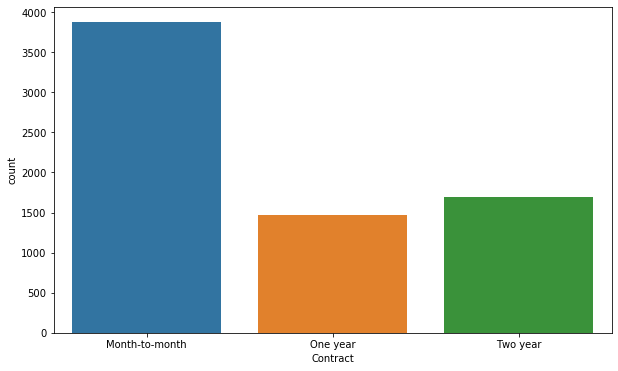

In [300]:
plt.figure(figsize=(10,6))
sns.countplot("Contract", data=df)

In [301]:
df[['Contract','Churn']].groupby('Contract').mean()

,Churn
Contract,
Month-to-month,0.427097
One year,0.112695
Two year,0.028319


**"Vital Interpretation: It seems like, as expected, customers with short-term contract are more likely to churn. This clearly explains the motivation for companies to have long-term relationship with their customers."**

In [302]:
df[['PaymentMethod','Churn']].groupby('PaymentMethod').mean()

,Churn
PaymentMethod,
Bank transfer (automatic),0.167098
Credit card (automatic),0.152431
Electronic check,0.452854
Mailed check,0.191067


As promised, I will now discuss the continuous features of dataset - the tenure (Number of months the customer has stayed with the company), monthly charges and total charges

Note that: The amount in total charges = Monthly Charges x tenure

**Note-**
So it is unnecessary to include total charges in the model, since it gives no new information- it's consolidated information can be found from 2 exisitng features.So it's better to reduce complexity

Let's also have a look at the distribution of continuous features

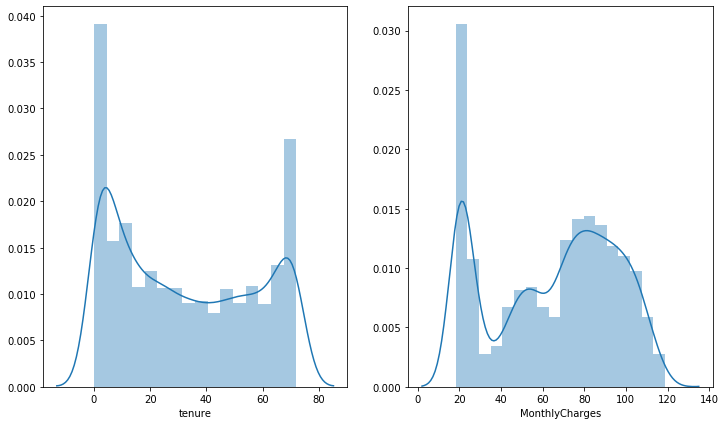

In [303]:
fig, axes = plt.subplots(1,2, figsize=(12, 7))

sns.distplot(df["tenure"], ax=axes[0])
sns.distplot(df["MonthlyCharges"], ax=axes[1])

**Vital Interpretation 2: We can see that customers are either pretty new or have stayed for a long time with the company**

Our goal should be finding a way to keep those customers with a tenure of up to a few months.

Let's check out how the churn rates vary with respect to tenure and Monthly charges

In [304]:
df[['tenure','MonthlyCharges','Churn']].groupby('Churn').mean()

,tenure,MonthlyCharges
Churn,,
0,37.569965,61.265124
1,17.979133,74.441332


It is clear that people who have been a customer for a long time tend to stay with the company.

We can see that the average tenure in months for people who left the company is 20 months less than the average for people who stay.

-------------------------------------------------------------------------------------------------------------------

Contract and tenure features may be correlated because customer with long term contract are likely to stay longer with the company. Let’s figure out.


In [305]:
df[['Contract','tenure']].groupby('Contract').mean()

,tenure
Contract,
Month-to-month,18.036645
One year,42.044807
Two year,56.735103


As expected, contract and tenure are highly correlated.Customers with long contracts have been a customer for longer time than customers with short-term contracts.

------------------------------------------------------------------------------------------------------------------------------




In [306]:
df.drop(['customerID','gender','PhoneService','Contract','TotalCharges'], axis=1, inplace=True)

In [307]:
df.head()


,SeniorCitizen,Partner,Dependents,tenure,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,PaperlessBilling,PaymentMethod,MonthlyCharges,Churn
0,0,Yes,No,1,No phone service,DSL,No,Yes,No,No,No,No,Yes,Electronic check,29.85,0
1,0,No,No,34,No,DSL,Yes,No,Yes,No,No,No,No,Mailed check,56.95,0
2,0,No,No,2,No,DSL,Yes,Yes,No,No,No,No,Yes,Mailed check,53.85,1
3,0,No,No,45,No phone service,DSL,Yes,No,Yes,Yes,No,No,No,Bank transfer (automatic),42.30,0
4,0,No,No,2,No,Fiber optic,No,No,No,No,No,No,Yes,Electronic check,70.70,1


# Part 2.1: Data Preprocessing

Categorical features need to be converted to numbers so that they can be included in calculations done by a machine learning model. The categorical variables in our dataset is not present in any order. We cannot openly say that "DSL" service is more superior to "Fiber Optic", but hey we need to classify the variables by considering the extent of changes or alterations they bring to our predictive modeling

When we encode the categorical variables, a number will be assigned to each category. The category with higher numbers will be considered more important or effect the model more. Therefore, we need to do encode the variables in a way that each category will be represented by a column and the value in that column will be 0 or 1.

**Note-** We also need to scale continuous variables. Otherwise, variables with higher values will be given more importance which effects the accuracy of the model.

In [308]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.preprocessing import MinMaxScaler

Let's take up categorical values first

In [309]:
cat_features = ['SeniorCitizen', 'Partner', 'Dependents',
        'MultipleLines', 'InternetService', 'OnlineSecurity',
       'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV',
       'StreamingMovies', 'PaperlessBilling', 'PaymentMethod']
X = pd.get_dummies(df, columns=cat_features, drop_first=True)

Let's scale the continuous variable too

In [310]:
sc = MinMaxScaler()
a = sc.fit_transform(df[['tenure']])
b = sc.fit_transform(df[['MonthlyCharges']])

In [311]:
X['tenure'] = a
X['MonthlyCharges'] = b

We omitted some variables and features before and transformed the others. So before evaluation, let's check the dimensions of our dataset

In [312]:
X.shape

(7043, 26)

# Part 2.2: Resampling 

As I mentioned in the beginning, target variables with imbalanced class distribution is not desired for machine learning model

**Note-** I will use upsampling which means increasing the number of samples of the class with less samples by randomly selecting rows from it.

Text(0.5, 1.0, 'Class Distribution Before Resampling')

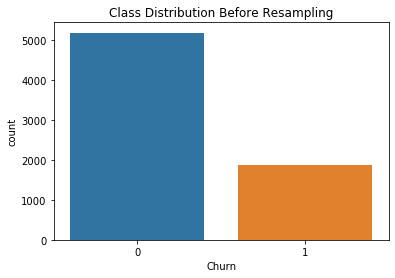

In [313]:
sns.countplot('Churn', data=df).set_title('Class Distribution Before Resampling')

Let's separate out the classes

Separating positive class (churn=yes) and negative class (churn=no)

In [314]:
X_no = X[X.Churn == 0]
X_yes = X[X.Churn == 1]

In [315]:
print(len(X_no),len(X_yes))


5174 1869


Upsampling the positive class - 

In [316]:
X_yes_upsampled = X_yes.sample(n=len(X_no), replace=True, random_state=42)
print(len(X_yes_upsampled))

5174


In [317]:
X_upsampled = X_no.append(X_yes_upsampled).reset_index(drop=True)

Text(0.5, 1.0, 'Class Distribution After Resampling')

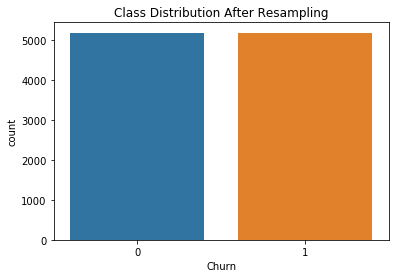

In [318]:
sns.countplot('Churn', data=X_upsampled).set_title('Class Distribution After Resampling')

# Part 3: Model Evaluation

As a rule, we need to divide the dataset into training and test subsets so that we are able to measure the performance of our model on new, previously unseen examples.

In [319]:
from sklearn.model_selection import train_test_split

X = X_upsampled.drop(['Churn'], axis=1) #features (independent variables)

y = X_upsampled['Churn'] #target (dependent variable)

In [320]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=42)

I have decided to work with the very basic ridge regression first (ridge classifier), I will then try to improve the model prediction efficiency on that

In [321]:
from sklearn.linear_model import RidgeClassifier

from sklearn.metrics import accuracy_score, confusion_matrix

In [322]:
clf_ridge = RidgeClassifier() #create a ridge classifier object

In [323]:
clf_ridge.fit(X_train,y_train)

RidgeClassifier(alpha=1.0, class_weight=None, copy_X=True, fit_intercept=True,
                max_iter=None, normalize=False, random_state=None,
                solver='auto', tol=0.001)

In [324]:
RidgeClassifier(alpha=1.0, class_weight=None, copy_X=True, fit_intercept=True,
        max_iter=None, normalize=False, random_state=None, solver='auto',
        tol=0.001)

RidgeClassifier(alpha=1.0, class_weight=None, copy_X=True, fit_intercept=True,
                max_iter=None, normalize=False, random_state=None,
                solver='auto', tol=0.001)

**Making predictions on training set and evaluating:**

In [325]:
pred = clf_ridge.predict(X_train)  #make predictions

In [326]:
accuracy_score(y_train, pred) #accuracy on training set

0.7574293307562213

In [327]:
confusion_matrix(y_train, pred)

array([[3051, 1079],
       [ 929, 3219]], dtype=int64)

In [328]:
pred_test = clf_ridge.predict(X_test)

In [329]:
accuracy_score(y_test, pred_test)

0.7608695652173914

**Result 1:Yesss!!-**

The model achieved 75% accuracy on training set and 76% accuracy on test set. The model is not overfitting because accuracies on training and test sets are pretty close. However, 75% accuracy is not very good so we will try to get a better accuracy using a different model.



We can do better with many advanced models, but let's go with Random Forest

**Random Forest**

In [330]:
from sklearn.ensemble import RandomForestClassifier

In [331]:
clf_forest = RandomForestClassifier(n_estimators=100, max_depth=10)

In [332]:
clf_forest.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=10, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [333]:
pred = clf_forest.predict(X_train)

In [334]:
accuracy_score(y_train, pred)

0.8865668035757429

In [335]:
confusion_matrix(y_train, pred)

array([[3432,  698],
       [ 241, 3907]], dtype=int64)

In [336]:
pred_test = clf_forest.predict(X_test)

In [337]:
accuracy_score(y_test, pred_test)

0.840096618357488

The accuracy on training set is 4% higher than the accuracy on test set which indicates a slight overfitting.

But standard classifier modelling allows us overfitting within values of 5%

**Very Important Note:-**

We can overcome the overfitting and improve the accuracy by other methods like hyperparameter tuning and increasing or decreasing the tree depth.

However, we must be aware that at every step in evaluating and improving our model, there is a trade-off. Increasing the tree depth may result in decreased accuracy, although reducing overfitting.

Thus we must keep in mind the various trade offs and the extent to which they effect our predictions

-----------------------------------------------------------------------------------------------------------------------------

Thanks for viewing!!

Created By- 
**Anmol Kalantri**